Assignment 01\
Group Members :\
    1. Sanket Rajendra Shah (3314026) \
    2. Rahul Kumar (3205783) 

In [8]:
import numpy as np
from mnist import MNIST
from matplotlib import pyplot as plt

In [9]:
mndata = MNIST("data")
train_images, train_labels = np.array(mndata.load_training()[0]),  np.array(mndata.load_training()[1])
test_images, test_labels = np.array(mndata.load_testing()[0]), np.array(mndata.load_testing()[1])

# preprocess training and validation set
X = train_images/255.0
x_train = np.ones((X.shape[0],X.shape[1]+1))
x_train[:,:-1] = X
y_train = np.zeros((train_labels.size, 10))
y_train[np.arange(train_labels.size), train_labels] = 1
x_val = x_train[:-10000]
y_val = y_train[:-10000]
x_train = x_train[:50000]
y_train = y_train[:50000]


In [10]:

# preprocess testing set
X = test_images/255.0
x_test = np.ones((X.shape[0],X.shape[1]+1))
x_test[:,:-1] = X
y_test = np.zeros((test_labels.size, 10))
y_test[np.arange(test_labels.size), test_labels] = 1


In [14]:
class NeuralNetwork():
    def __init__(self,sizes,batch_size,l_rate=0.001,epochs=10):
        self.sizes = sizes
        self.batch_size = batch_size
        self.epochs = epochs
        self.l_rate = l_rate
        self.weights = self.weight_initialization()

    def sigmoid(self,x,derivative=False):
        if derivative:
            return (np.exp(-x)) / ((np.exp(-x) + 1) ** 2)
        return 1 / (1 + np.exp(-x))

    def softmax(self,x,derivative=False):
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)

    def weight_initialization(self):
        input_layer = self.sizes[0]
        hidden_1 = self.sizes[1]
        output_layer = self.sizes[2]
        weights = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(output_layer, hidden_1) * np.sqrt(1. / output_layer),
        }

        return weights

    def forward_pass(self,x_train):
        weights = self.weights
        weights['A0'] = x_train

        weights['Z1']  = np.dot(weights['W1'],weights['A0'])
        weights['A1'] = self.sigmoid(weights['Z1'])

        weights['Z2'] = np.dot(weights['W2'],weights['A1'])
        weights['A2'] = self.softmax(weights['Z2'])

        return weights['A2']

    def backpropogation(self,y_train,output):
        weights = self.weights
        update_w = {}

        delta = 2 * ( output - y_train ) / output.shape[0] * self.softmax(weights['Z2'], derivative=True)
        update_w['W2'] = np.outer(delta, weights['A1'])

        delta = np.dot(weights['W2'].T, delta)*self.sigmoid(weights['Z1'],derivative=True)
        update_w['W1'] = np.outer(delta, weights['A0'])

        return update_w

    def update_weights(self, update_w):
        for param, update in update_w.items():
            self.weights[param] -= self.l_rate * update

    def accuracy(self, x_val, y_val):
        predictions = []
        for x, y in zip(x_val, y_val):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        return np.mean(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        validation_accuracy = []
        for iteration in range(self.epochs):
            for x, y in zip(x_train, y_train):
                output = self.forward_pass(x)
                update_w = self.backpropogation(y, output)
                self.update_weights(update_w)
            accuracy = self.accuracy(x_val, y_val)
            validation_accuracy.append(accuracy)
            print('Epoch: {0} ',iteration ,'Accuracy: ', accuracy*100)
        return validation_accuracy
    def test(self, x_test, y_test):
        predictions = []
        for x, y in zip(x_test, y_test):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        return np.mean(predictions)


In [15]:
nn = NeuralNetwork([785,65,10],20)
validation_accuracy = nn.train(x_train , y_train, x_val, y_val)
testing_accuracy = nn.test(x_test,y_test)

Epoch: {0}  0 Accuracy:  37.446
Epoch: {0}  1 Accuracy:  50.644
Epoch: {0}  2 Accuracy:  59.718
Epoch: {0}  3 Accuracy:  65.944
Epoch: {0}  4 Accuracy:  69.554
Epoch: {0}  5 Accuracy:  72.048
Epoch: {0}  6 Accuracy:  73.75
Epoch: {0}  7 Accuracy:  75.02600000000001
Epoch: {0}  8 Accuracy:  75.952
Epoch: {0}  9 Accuracy:  76.77199999999999


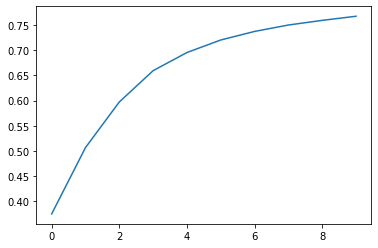

In [16]:
plt.plot(np.arange(len(validation_accuracy)),validation_accuracy)
plt.show()

In [17]:
print("The accuracy on the test set is ", testing_accuracy)

The accuracy on the test set is  0.7821
